In [ ]:
										#ml-assignment-frac3-m22ai608#

In [49]:
#Learning to implement Neural Network
#Gurmukhi Handwritten Digit Classification: Gurmukhi is one of the popularIndian scripts widely used in Indian state of Punjab. In this part of the assignment,our goal is to develop a neural network solution (a simple NN, not a CNN) for classifyingGurmukhi digits. We provide you Handwritten Gurmukhi digit dataset here:

#Dataset link
#Modify the code provided in here and a video tutorial here, and develop a robustneural network to classify the Gurmukhi digits. Higher performance on test set willhave bonus point. Briefly write your observation and submit your code so that we canevaluate your implementation at our end

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import os
from keras.layers import Dense, Flatten
import tensorflow as tf
from tensorflow import keras

In [15]:
from keras.datasets import mnist

In [2]:
train_path = "C:\\Users\\Admin\\Downloads"
train_path

'C:\\Users\\Admin\\Downloads'

In [3]:
val_path="C:\\Users\\Admin\\Downloads"
val_path

'C:\\Users\\Admin\\Downloads'

In [4]:
# Set the path to the folder containing the 'train' folder
data_directory = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []


In [5]:
# Loop over each folder from '0' to '9'
for label in range(10):
 	folder_path = os.path.join(data_directory, 'train', str(label))
 	# Loop over each image in the folder
 	for file in os.listdir(folder_path):
 		file_path = os.path.join(folder_path, file)
 		if file_path.endswith(('.tiff','.bmp')):
	 		# Load the image and resize it to the desired size
	 		img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
	 		img = cv2.resize(img, img_size)
			 # Append the image and label to the lists
 			images.append(img)
 			labels.append(label)

In [6]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [7]:
print(images,labels)

[[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255   0 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ...   0 255 255]
  ...
  [255 255 255 ...   0 255 255]
  [255 255 255 ...   0 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ... 255 255 255]
  ...
  [255 255   0 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [8]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_values = []
labels_values = []

In [9]:
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path=os.path.join(data_directory,'val',str(label))
    #loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)            
            #append the image and label to the lists
            images_values.append(img)
            labels_values.append(label)

In [11]:
# Convert the lists to NumPy arrays
images_values = np.array(images_values)
labels_values = np.array(labels_values)
# Save the arrays in NumPy format
np.save('x_test.npy', images_values)
np.save('y_test.npy', labels_values)

In [12]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [13]:
print('x_train',y_train,x_test,y_test)

x_train [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 

Number of images in training set: 1000
Number of images in test set: 178
Shape of first training image: (32, 32)
Label of first training image: 0
Label of 130th test image: 7


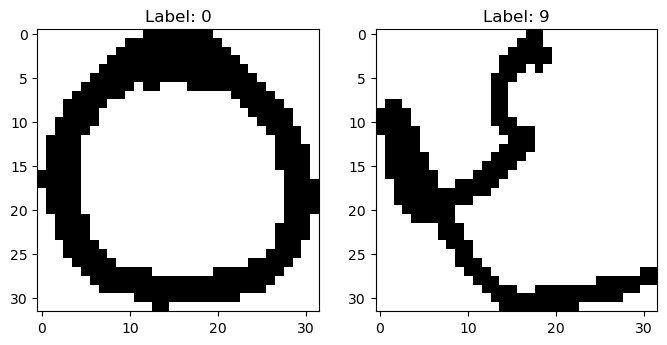

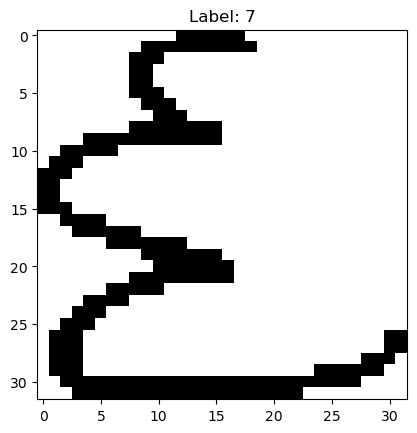

In [22]:
# test the images are loaded correctly
print(f"Number of images in training set: {len(x_train)}")
print(f"Number of images in test set: {len(x_test)}")
print(f"Shape of first training image: {x_train[0].shape}")
print(f"Label of first training image: {y_train[0]}")
print(f"Label of 130th test image: {y_test[130]}")

# Display example images
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.subplot(1, 2, 2)
plt.imshow(x_train[988], cmap='gray')
plt.title(f"Label: {y_train[972]}")
plt.show()

# Display an image from the test set
plt.figure()
plt.imshow(x_test[120], cmap='gray')
plt.title(f"Label: {y_test[122]}")
plt.show()

In [25]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid') 
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))


Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 171.1082 - accuracy: 0.3850 - val_loss: 52.0979 - val_accuracy: 0.5674
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 26.0582 - accuracy: 0.7840 - val_loss: 25.3502 - val_accuracy: 0.7472
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 15.5550 - accuracy: 0.8670 - val_loss: 25.0089 - val_accuracy: 0.7921
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 9.6651 - accuracy: 0.9040 - val_loss: 27.1390 - val_accuracy: 0.7921
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 8.6695 - accuracy: 0.9100 - val_loss: 17.5808 - val_accuracy: 0.8596
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 5.5868 - accuracy: 0.9410 - val_loss: 19.8201 - val_accuracy: 0.8483
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8666 - accuracy: 0.9400 - val_loss: 21.4528 - val_accuracy: 0.8652
Epoch 8/1

In [ ]:

# Observation : we see a better accuracy from the 2nd iteration
# now scale and try to check the accuracy, divide dataset by 255 

In [26]:

x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7920 - accuracy: 0.8890 - val_loss: 1.1143 - val_accuracy: 0.6966
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7872 - accuracy: 0.8830 - val_loss: 1.0537 - val_accuracy: 0.7472
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.9230 - val_loss: 1.0052 - val_accuracy: 0.7978
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.9560 - val_loss: 0.9705 - val_accuracy: 0.8427
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.9720 - val_loss: 0.9467 - val_accuracy: 0.8708
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.9840 - val_loss: 0.9288 - val_accuracy: 0.8820
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.9880 - val_loss: 0.9159 - val_accuracy: 0.8876
Epoch 8/10
32/32 [==

In [ ]:
# Observation : we got better result for all iterations on scaling the training dataset

In [27]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.8933


[0.8895570635795593, 0.8932584524154663]

6/6 [==============================] - 0s 3ms/step
Prediction for the first image: 0
Prediction for image 78: 4
Prediction for image 144: 8


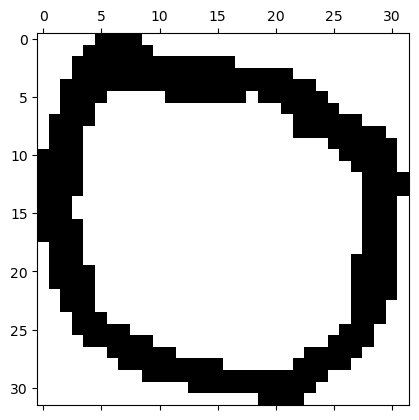

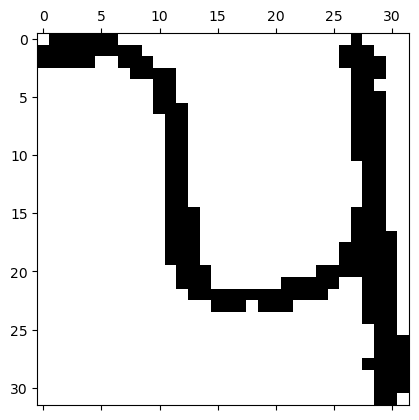

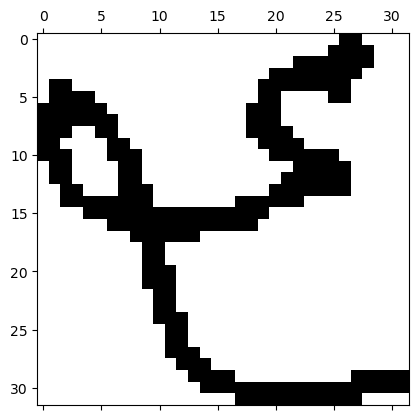

In [34]:
# Predict the first image
plt.matshow(x_test[0], cmap='gray')
y_predicted = model.predict(x_test_scaled)
print("Prediction for the first image:", np.argmax(y_predicted[0]))

# Test some more values
plt.matshow(x_test[88], cmap='gray')
print("Prediction for image 78:", np.argmax(y_predicted[78]))

plt.matshow(x_test[177], cmap='gray')
print("Prediction for image 144:", np.argmax(y_predicted[144]))

In [35]:

# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0, 13,  1,  1,  0,  0,  0,  0,  2],
       [ 0,  0,  1, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0, 16,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

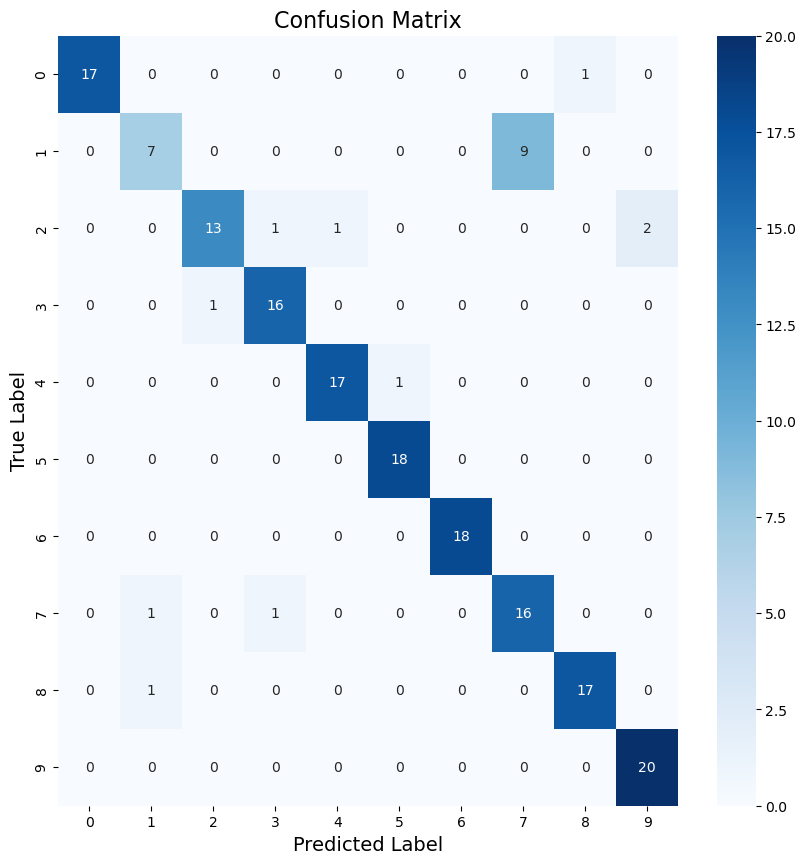

In [40]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
plt.show()

In [ ]:
# here we can see there are some errors 
# we need to modify our nn, we add some layers in the above model and different activation function


In [41]:

# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 3s 54ms/step - loss: 1.2606 - accuracy: 0.7080 - val_loss: 0.4655 - val_accuracy: 0.8427
Epoch 2/10
32/32 [==============================] - 1s 35ms/step - loss: 0.1965 - accuracy: 0.9410 - val_loss: 0.2809 - val_accuracy: 0.9213
Epoch 3/10
32/32 [==============================] - 1s 35ms/step - loss: 0.1299 - accuracy: 0.9670 - val_loss: 0.3043 - val_accuracy: 0.9045
Epoch 4/10
32/32 [==============================] - 1s 36ms/step - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.3462 - val_accuracy: 0.8989
Epoch 5/10
32/32 [==============================] - 1s 34ms/step - loss: 0.0525 - accuracy: 0.9880 - val_loss: 0.2107 - val_accuracy: 0.9438
Epoch 6/10
32/32 [==============================] - 1s 33ms/step - loss: 0.0499 - accuracy: 0.9890 - val_loss: 0.2080 - val_accuracy: 0.9438
Epoch 7/10
32/32 [==============================] - 1s 35ms/step - loss: 0.0208 - accuracy: 0.9970 - val_loss: 0.1837 - val_accuracy: 0.9494
Epoch 8/10
32

In [42]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.1871 - accuracy: 0.9551


[0.18714649975299835, 0.9550561904907227]

In [43]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy
# redo the confusion matrix 
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 11ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

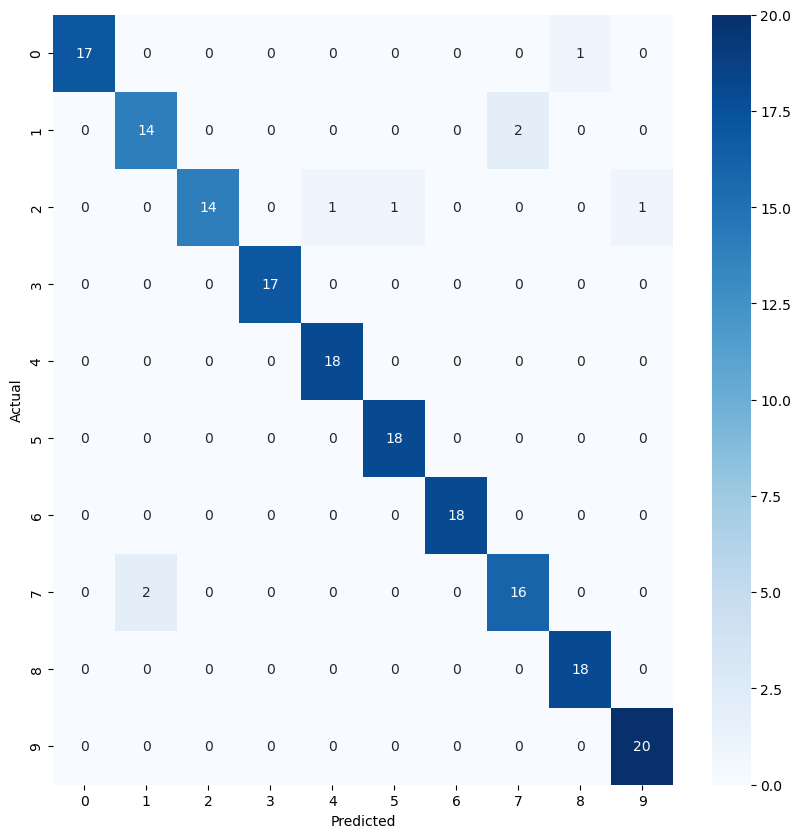

In [45]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
# Observatoin : we see in the updated model, there are less number of errors, 


6/6 [==============================] - 0s 7ms/step - loss: 18.2747 - accuracy: 0.8876
Test accuracy: 0.8876404762268066


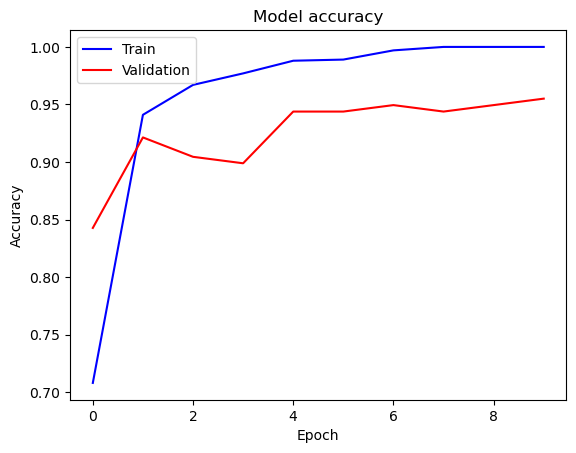

In [47]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()